Tasca M9 T01

Exercici 1
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

He decidit agafar el discurs d'obertura de Mao Zedong a la Primera Sessió Plenària de la Conferència Consultiva Política del Poble Xinès (CPPCC) el 21 de setembre de 1949. Aquest discurs es recorda com un moment històric que va donar forma al panorama polític de la Xina i va establir les bases dels primers anys de la República Popular. Va ser un pas clau en la consolidació del domini comunista i l'establiment d'un nou estat socialista a la Xina.

https://china.usc.edu/Mao-declares-founding-of-peoples-republic-of-china-chinese-people-have-stood-up

1: Importem biblioteques i descarreguem recursos NLTK

In [133]:
import pandas as pd
import numpy as np
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [134]:
# Importem el discurs que guardarem com Mao_Zedong
Mao_Zedong = """Fellow Delegates,

The Political Consultative Conference so eagerly awaited by the whole nation is herewith inaugurated.

Our conference is composed of more than six hundred delegates, representing all the democratic parties and people's organizations of China, the People's Liberation Army, the various regions and nationalities of the country and the overseas Chinese. This shows that ours is a conference embodying the great unity of the people of the whole country.

It is because we have defeated the reactionary Kuomintang government backed by U.S. imperialism that this great unity of the whole people has been achieved. In a little more than three years the heroic Chinese People's Liberation Army, an army such as the world has seldom seen, crushed all the offensives launched by the several million troops of the U.S.-supported reactionary Kuomintang government and turned to the counter-offensive and the offensive. At present the field armies of the People's Liberation Army, several million strong, have pushed the war to areas near Taiwan, Kwangtung, Kwangsi, Kweichow, Szechuan and Sinkiang, and the great majority of the Chinese people have won liberation. In a little more than three years the people of the whole country have closed their ranks, rallied to support the People's Liberation Army, fought the enemy and won basic victory. And it is on this foundation that the present People's Political Consultative Conference is convened.

Our conference is called the Political Consultative Conference because some three years ago we held a Political Consultative Conference with Chiang Kai-shek's Kuomintang. The results of that conference were sabotaged by Chiang Kai-shek's Kuomintang and its accomplices; nevertheless the conference left an indelible impression on the people. It showed that nothing in the interest of the people could be accomplished together with Chiang Kai-shek's Kuomintang, the running dog of imperialism, and its accomplices. Even when resolutions were reluctantly adopted, it was of no avail, for as soon as the time was ripe, they tore them up and started a ruthless war against the people. The only gain from that conference was the profound lesson it taught the people that there is absolutely no room for compromise with Chiang Kai-shek's Kuomintang, the running dog of imperialism, and its accomplices -- overthrow these enemies or be oppressed and slaughtered by them, either one or the other, there is no other choice. In a little more than three years the Chinese people, led by the Chinese Communist Party, have quickly awakened and organized themselves into a nation-wide united front against imperialism, feudalism, bureaucrat-capitalism and their general representative, the reactionary Kuomintang government, supported the People's War of Liberation, basically defeated the reactionary Kuomintang government, overthrown the rule of imperialism in China and restored the Political Consultative Conference.

The present Chinese People's Political Consultative Conference is convened on an entirely new foundation; it is representative of the people of the whole country and enjoys their trust and support. Therefore, the conference proclaims that it will exercise the functions and powers of a National People's Congress. In accordance with its agenda, the conference will enact the Organic Law of the Chinese People's Political Consultative Conference, the Organic Law of the Central People's Government of the People's Republic of China and the Common Programme of the Chinese People's Political Consultative Conference; it will elect the National Committee of the Chinese People's Political Consultative Conference and the Central People's Government Council of the People's Republic of China; it will adopt the national flag and national emblem of the People's Republic of China; and it will decide on the seat of the capital of the People's Republic of China and adopt the chronological system in use in most countries of the world.

Fellow Delegates, we are all convinced that our work will go down in the history of mankind, demonstrating that the Chinese people, comprising one quarter of humanity, have now stood up. The Chinese have always been a great, courageous and industrious nation; it is only in modern times that they have fallen behind. And that was due entirely to oppression and exploitation by foreign imperialism and domestic reactionary governments. For over a century our forefathers never stopped waging unyielding struggles against domestic and foreign oppressors, including the Revolution of 1911 led by Dr. Sun Yat-sen, our great forerunner in the Chinese revolution. Our forefathers enjoined us to carry out their unfulfilled will. And we have acted accordingly. We have closed our ranks and defeated both domestic and foreign oppressors through the People's War of Liberation and the great people's revolution, and now we are proclaiming the founding of the People's Republic of China. From now on our nation will belong to the community of the peace-loving and freedom-loving nations of the world and work courageously and industriously to foster its own civilization and well-being and at the same time to promote world peace and freedom. Ours will no longer be a nation subject to insult and humiliation. We have stood up. Our revolution has won the sympathy and acclaim of the people of all countries. We have friends all over the world.

Our revolutionary work is not completed, the People's War of Liberation and the people's revolutionary movement are still forging ahead and we must keep up our efforts. The imperialists and the domestic reactionaries will certainly not take their defeat lying down; they will fight to the last ditch. After there is peace and order throughout the country, they are sure to engage in sabotage and create disturbances by one means or another and every day and every minute they will try to stage a come-back. This is inevitable and beyond all doubt, and under no circumstances must we relax our vigilance.

Our state system, the people's democratic dictatorship, is a powerful weapon for safeguarding the fruits of victory of the people's revolution and for thwarting the plots of domestic and foreign enemies for restoration, and this weapon we must firmly grasp. Internationally, we must unite with all peace-loving and freedom-loving countries and peoples, and first of all with the Soviet Union and the New Democracies, so that we shall not stand alone in our struggle to safeguard these fruits of victory and to thwart the plots of domestic and foreign enemies for restoration. As long as we persist in the people's democratic dictatorship and unite with our foreign friends, we shall always be victorious.

The people's democratic dictatorship and solidarity with our foreign friends will enable us to accomplish our work of construction rapidly. We are already confronted with the task of nation-wide economic construction. We have very favourable conditions: a population of 475 million people and a territory of 9,600,000 square kilometres. There are indeed difficulties ahead, and a great many too. But we firmly believe that by heroic struggle the people of the country will surmount them all. The Chinese people have rich experience in overcoming difficulties. If our forefathers, and we also, could weather long years of extreme difficulty and defeat powerful domestic and foreign reactionaries, why can't we now, after victory, build a prosperous and flourishing country? As long as we keep to our style of plain living and hard struggle, as long as we stand united and as long as we persist in the people's democratic dictatorship and unite with our foreign friends, we shall be able to win speedy victory on the economic front.

An upsurge in economic construction is bound to be followed by an upsurge of construction in the cultural sphere. The era in which the Chinese people were regarded as uncivilized is now ended. We shall emerge in the world as a nation with an advanced culture.

Our national defence will be consolidated and no imperialists will ever again be allowed to invade our land. Our people's armed forces must be maintained and developed with the heroic and steeled People's Liberation Army as the foundation. We will have not only a powerful army but also a powerful air force and a powerful navy.

Let the domestic and foreign reactionaries tremble before us! Let them say we are no good at this and no good at that. By our own indomitable efforts we the Chinese people will unswervingly reach our goal.

The heroes of the people who laid down their lives in the People's War of Liberation and the people's revolution shall live for ever in our memory!

Hail the victory of the People's War of Liberation and the people's revolution!

Hail the founding of the People's Republic of China!

Hail the triumph of the Chinese People's Political Consultative Conference!"""

print(Mao_Zedong)

Fellow Delegates,

The Political Consultative Conference so eagerly awaited by the whole nation is herewith inaugurated.

Our conference is composed of more than six hundred delegates, representing all the democratic parties and people's organizations of China, the People's Liberation Army, the various regions and nationalities of the country and the overseas Chinese. This shows that ours is a conference embodying the great unity of the people of the whole country.

It is because we have defeated the reactionary Kuomintang government backed by U.S. imperialism that this great unity of the whole people has been achieved. In a little more than three years the heroic Chinese People's Liberation Army, an army such as the world has seldom seen, crushed all the offensives launched by the several million troops of the U.S.-supported reactionary Kuomintang government and turned to the counter-offensive and the offensive. At present the field armies of the People's Liberation Army, several mill

2: Preprocessament del text

In [135]:
# Carreguem el model spaCy per a l'anglès
nlp = spacy.load('en_core_web_sm')

# Tokenizem el text
doc = nlp(Mao_Zedong)

# Creem la llista de fitxes en minúscules
tokens_lower = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]

# Comptem la freqüència de cada token
word_freq = Counter(tokens_lower)

print(tokens_lower)

['fellow', 'delegates', 'the', 'political', 'consultative', 'conference', 'so', 'eagerly', 'awaited', 'by', 'the', 'whole', 'nation', 'is', 'herewith', 'inaugurated', 'our', 'conference', 'is', 'composed', 'of', 'more', 'than', 'six', 'hundred', 'delegates', 'representing', 'all', 'the', 'democratic', 'parties', 'and', 'people', "'s", 'organizations', 'of', 'china', 'the', 'people', "'s", 'liberation', 'army', 'the', 'various', 'regions', 'and', 'nationalities', 'of', 'the', 'country', 'and', 'the', 'overseas', 'chinese', 'this', 'shows', 'that', 'ours', 'is', 'a', 'conference', 'embodying', 'the', 'great', 'unity', 'of', 'the', 'people', 'of', 'the', 'whole', 'country', 'it', 'is', 'because', 'we', 'have', 'defeated', 'the', 'reactionary', 'kuomintang', 'government', 'backed', 'by', 'u.s.', 'imperialism', 'that', 'this', 'great', 'unity', 'of', 'the', 'whole', 'people', 'has', 'been', 'achieved', 'in', 'a', 'little', 'more', 'than', 'three', 'years', 'the', 'heroic', 'chinese', 'peopl

Aquest codi ha tokenitzat el text d'entrada mitjançant SpaCy, convertit els fitxes en minúscules, filtra els signes de puntuació i els espais. També compta la freqüència de cada testimoni únic en minúscules. El resultat final és un comptador (word_freq) que conté la distribució de freqüència de les paraules al text. Amb aquest word_freq podem crear un gràfic per veure quines són les 10 paraules més utilitzades abans de treure els stopwords i que realitzem el stemming del text.

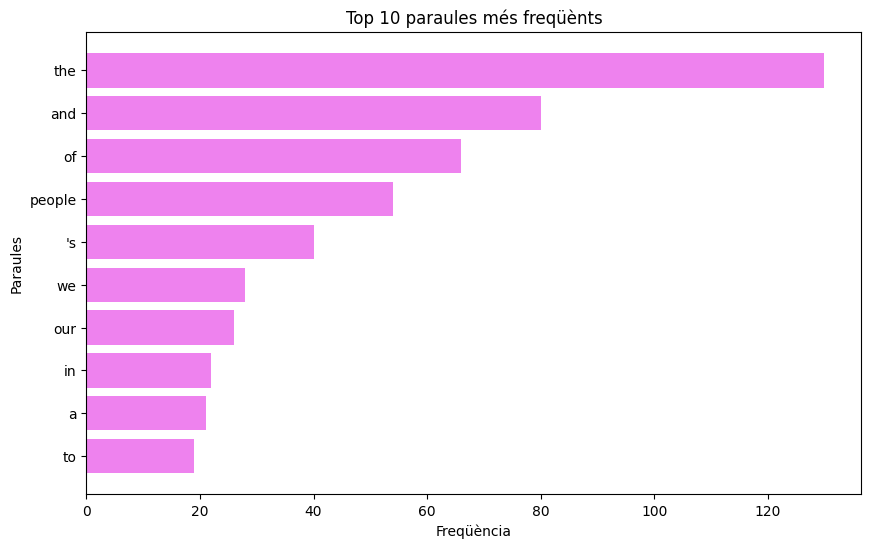

In [136]:
# Obtenim les 10 paraules més habituals
common_words = word_freq.most_common(10)

# Descomprimim les paraules i les seves freqüències en llistes separades
words, frequencies = zip(*common_words)

# Invertim l'ordre per mostrar de la freqüència més gran a la més baixa
words = list(reversed(words))
frequencies = list(reversed(frequencies))

# Creem un gràfic de barres horitzontals per a les 10 paraules més freqüents
plt.figure(figsize=(10, 6))
plt.barh(words, frequencies, color='Violet')
plt.xlabel('Freqüència')
plt.ylabel('Paraules')
plt.title('Top 10 paraules més freqüènts')
plt.show()

En el resultat podem veure que la freqüència més gran l'ocupen paraules funcionals o buides que tenen funcions gramaticals, però no tenen un significat lèxic o substantiu en si mateixes.

És per això que tornarem a tokenitzar de nou el text però excloent-ne els "stopwords", i seleccionar només els substantius, verbs i adjectius. 

Exercici 2
Treu les stopwords i realitza stemming al teu conjunt de dades.

In [137]:
# Carreguem el model de llenguatge de spaCy
nlp = spacy.load('en_core_web_sm')

# Processem el text amb spaCy per obtenir un objecte Doc
doc = nlp(Mao_Zedong)

# Filtrem stop words i seleccionar només els substantius, verbs i adjectius, assegurant-nos que no inclou '-' 
filtered_tokens = [token.text for token in doc if token.pos_ in ['NOUN', 'VERB', 'ADJ'] and not token.is_stop and '-' not in token.text]

# Ara podem comptar la freqüència dels tokens filtrats
filtered_word_freq = Counter(filtered_tokens)

print(filtered_tokens)

['awaited', 'nation', 'inaugurated', 'conference', 'composed', 'delegates', 'representing', 'democratic', 'parties', 'people', 'organizations', 'regions', 'nationalities', 'country', 'overseas', 'shows', 'conference', 'embodying', 'great', 'unity', 'people', 'country', 'defeated', 'reactionary', 'government', 'backed', 'imperialism', 'great', 'unity', 'people', 'achieved', 'little', 'years', 'heroic', 'army', 'world', 'seen', 'crushed', 'offensives', 'launched', 'troops', 'reactionary', 'government', 'turned', 'counter', 'offensive', 'offensive', 'present', 'field', 'armies', 'strong', 'pushed', 'war', 'areas', 'great', 'majority', 'Chinese', 'people', 'won', 'liberation', 'little', 'years', 'people', 'country', 'closed', 'ranks', 'rallied', 'support', 'fought', 'enemy', 'won', 'basic', 'victory', 'foundation', 'present', 'convened', 'conference', 'called', 'years', 'held', 'results', 'conference', 'sabotaged', 'accomplices', 'conference', 'left', 'indelible', 'impression', 'people', '

Ara que hem fet aquesta primera etapa de processament, tornem a mirar quines són les paraules més freqüents:

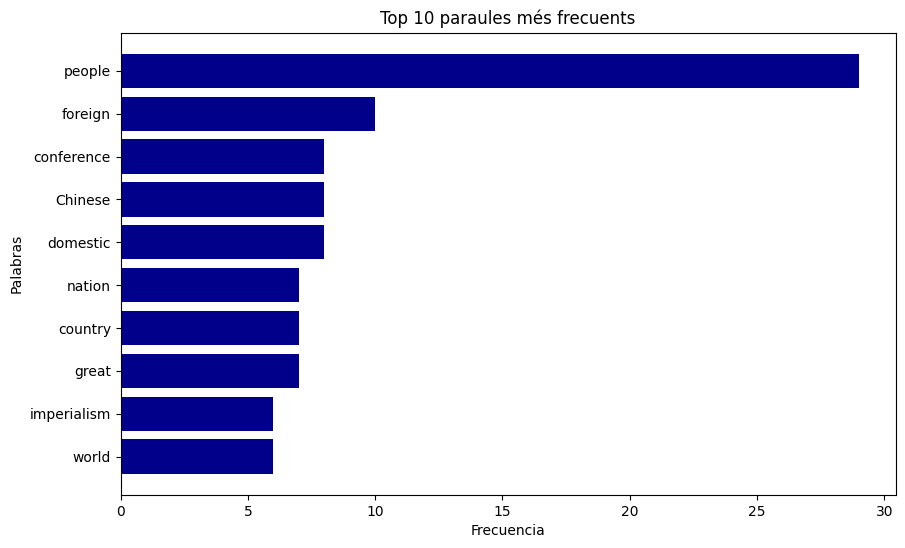

In [138]:
# # Obtenim les 10 paraules més habituals
filtered_common_words = filtered_word_freq.most_common(10)

# Descomprimim les paraules i les seves freqüències en llistes separades
words, frequencies = zip(*filtered_common_words)

# Invertim l'ordre per mostrar de la freqüència més gran a la més baixa
words = list(reversed(words))
frequencies = list(reversed(frequencies))

# Creem un gràfic de barres horitzontals per a les 10 paraules més freqüents
plt.figure(figsize=(10, 6))
plt.barh(words, frequencies, color='Darkblue')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.title('Top 10 paraules més frecuents')
plt.show()

Donada la importància històrica del discurs, podem oferir una interpretació més matisada de les 10 paraules més utilitzades:
- people (Poble): Subratlla el paper central del poble en la narrativa política, alineant-se amb la ideologia comunista que prioritza el col·lectiu.
- foreign (estranger): suggereix la consideració de les relacions externes, probablement reflectint el context geopolític de l'època, inclòs el reconeixement internacional i els compromisos diplomàtics.
- conference (Conferència): Destaca la importància de la trobada política, indicant un enfocament en la col·laboració, la creació de consens i el discurs polític.
- Chinese (Xinès): Reforça l'èmfasi en la nació i el poble xinesos, reflectint un sentit d'identitat nacional i orgull.
- domestic (Intern): Indica atenció als afers interns o domèstics, reflectint una preocupació pel benestar i desenvolupament de la nació.
- nation: Subratlla el concepte de nació, subratllant la importància de la unitat i la identitat nacionals.
- country (País): semblant a "nació", subratlla l'atenció al país en el seu conjunt, que abasta les dimensions polítiques, econòmiques i socials.
- great (Gran): Implica una avaluació positiva i posa l'accent en la importància dels èxits o aspiracions en el context de la construcció d'un nou estat.
- imperialism (Imperialisme): Indica un compromís crític amb el context històric, abordant les preocupacions sobre la influència estrangera i l'imperialisme.
- world (Món): Suggereix una perspectiva i consciència globals, possiblement reflectint el paper evolutiu de la Xina a l'escenari internacional i la seva visió del món.
En el context del discurs de Mao Zedong, aquestes paraules transmeten col·lectivament temes d'identitat nacional, desenvolupament domèstic, relacions internacionals i l'establiment d'un nou ordre polític. L'èmfasi en el poble, la nació i la posició crítica cap a l'imperialisme s'alinea amb la narrativa més àmplia del Partit Comunista Xinès durant aquest període transformador de la història de la Xina.

Podem passar al stemming.
La derivació (stemming) implica reduir les paraules a la seva forma base o arrel, eliminant sufixos o prefixos. El propòsit de derivar és agrupar diferents flexions o derivacions d'una paraula, tractant-les com una arrel comuna.

In [139]:
# Inicialitzem el Porter Stemmer
stemmer = PorterStemmer()

# Apliquem stemming a cada paraula
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

# Comptem la freqüència de cada arrel
stemmed_freq = Counter(stemmed_tokens)

print(stemmed_tokens)

['await', 'nation', 'inaugur', 'confer', 'compos', 'deleg', 'repres', 'democrat', 'parti', 'peopl', 'organ', 'region', 'nation', 'countri', 'oversea', 'show', 'confer', 'embodi', 'great', 'uniti', 'peopl', 'countri', 'defeat', 'reactionari', 'govern', 'back', 'imperi', 'great', 'uniti', 'peopl', 'achiev', 'littl', 'year', 'heroic', 'armi', 'world', 'seen', 'crush', 'offens', 'launch', 'troop', 'reactionari', 'govern', 'turn', 'counter', 'offens', 'offens', 'present', 'field', 'armi', 'strong', 'push', 'war', 'area', 'great', 'major', 'chines', 'peopl', 'won', 'liber', 'littl', 'year', 'peopl', 'countri', 'close', 'rank', 'ralli', 'support', 'fought', 'enemi', 'won', 'basic', 'victori', 'foundat', 'present', 'conven', 'confer', 'call', 'year', 'held', 'result', 'confer', 'sabotag', 'accomplic', 'confer', 'left', 'indel', 'impress', 'peopl', 'show', 'interest', 'peopl', 'accomplish', 'run', 'dog', 'imperi', 'accomplic', 'resolut', 'adopt', 'avail', 'time', 'ripe', 'tore', 'start', 'ruthl

Tornem a mirar el top 10 per veure si ara que hem fet stemming, els termes han canviat:

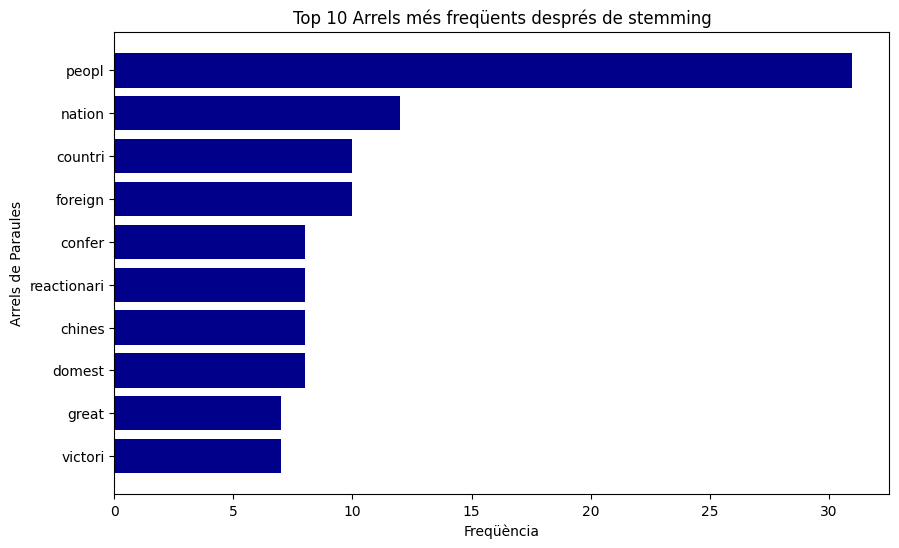

In [140]:
# Obtenim les 10 tiges més comunes
stemmed_common = stemmed_freq.most_common(10)

# Desempaqueteu les tiges i les seves freqüències en llistes separades
stems, stem_frequencies = zip(*stemmed_common)

# Invertim l'ordre per mostrar de la freqüència més gran a la més petita
stems = list(reversed(stems))
stem_frequencies = list(reversed(stem_frequencies))

# Creem un gràfic de barres horitzontals per a les 10 tiges més freqüents
plt.figure(figsize=(10, 6))
plt.barh(stems, stem_frequencies, color='Darkblue')
plt.xlabel('Freqüència')
plt.ylabel('Arrels de Paraules')
plt.title('Top 10 Arrels més freqüents després de stemming')
plt.show()

Les paraules ja no tenen el mateix ordre. El canvi en la freqüència de les paraules després de la derivació es pot atribuir a la naturalesa de la mateixa derivació i com consolida diferents flexions i variacions de paraules en les seves formes arrels comunes. El canvi en les freqüències de les paraules després de la derivació pot indicar que el text original tenia variacions de paraules que es van consolidar durant el procés de derivació, donant lloc a una representació més centrada i normalitzada del vocabulari. 

Exercici 3
Realitza sentiment analysis al teu conjunt de dades.

Utilitzarem VADER (Valence Aware Dictionary and Sentiment Reasoner)/. Vader és una eina d'anàlisi de sentiments basada en regles i lèxic dissenyada per analitzar el sentiment de dades de text, especialment en el context de les xarxes socials i el contingut breu.

In [141]:
# Creem la instància de SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Calculem puntuacions de polaritat
sentiment = sia.polarity_scores(Mao_Zedong)

# Imprimim els resultats
print(sentiment)

{'neg': 0.071, 'neu': 0.812, 'pos': 0.117, 'compound': 0.9966}


Resultats:
neg (Negatiu): 0.071
neu (Neutral): 0.812
pos (Positiu): 0.117
puntuació composta: 0.9966

El sentiment general del text analitzat és molt positiu, tal com indica l'alta puntuació composta. La major part del text es classifica com a neutral, amb una petita part que expressa un sentiment positiu i una part encara més petita que expressa un sentiment negatiu.

És important tenir en compte que VADER és especialment útil per analitzar sentiments en textos breus, com ara frases o paràgrafs. Si s'aplica a textos més llargs, pot proporcionar una puntuació global de sentiment que potser no capta variacions matisades de sentiment al llarg del text. Llavors sembla interessant fer un anàlisis per frase del discurs.

In [142]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
import numpy as np

# Inicialitzem l'analitzador de sentiment de VADER
sia = SentimentIntensityAnalyzer()

# Dividim el text per frases
sentences = tokenize.sent_tokenize(Mao_Zedong)

# Analitzem el sentiment de cada frase i obtenim la puntuació composta
compound_scores = [sia.polarity_scores(sentence)['compound'] for sentence in sentences]

# Calculem la mitjana de les puntuacions compostes
average_compound = np.mean(compound_scores)
print(f"Sentiment mitjà compost: {average_compound}")

Sentiment mitjà compost: 0.12298070175438597


El sentiment mitjà compost del text és lleugerament positiu, però no molt fort, indicat per la puntuació composta. Amb els antecedents històrics (fi de la dinastia, guerra civil, invasió japonesa, auge d'ideologies) i el context del discurs (cònsol al poble), aquesta valoració sembla adequada.

A fi de veure com progressa aquest sentiment, he volgut crear un gràfic traçant aquesta evolució. Per això tornem a utilitzar el codi abans, però una versió que inclou tots els passos d'abans junts.

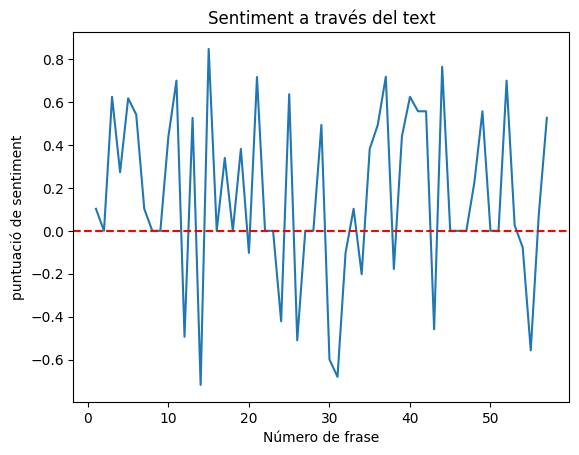

In [156]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt

# Tokenizant el text en frases
tokenized_sentences = sent_tokenize(Mao_Zedong)

Sentences = []
Sent_scores = []

i = 1  # inicialitzem el número a la 1a frase
for s in tokenized_sentences:
    stemmer = PorterStemmer()
    sentiment_analisis_sentence = SentimentIntensityAnalyzer()
    Sentences.append(i)  # afegim n frase a la llista
    tokenized_words_sentence = word_tokenize(s)  # separem la frase en paraules
    tokenized_words_sentence_strip = [w.lower() for w in tokenized_words_sentence if w.isalpha()]  # traiem les majúscules i la puntuació
    filtered_sentence = [w for w in tokenized_words_sentence_strip if w not in stopwords.words('english')]  # treiem el stopwords
    stemmed_sentence = [stemmer.stem(w) for w in filtered_sentence]  # stemming
    processed_sentence = ' '.join(stemmed_sentence)  # juntem les paraules stemmeades
    Sent_scores.append(sentiment_analisis_sentence.polarity_scores(processed_sentence)['compound'])  # calculem la puntuació de sentiment
    i = i + 1

plt.plot(Sentences, Sent_scores)  # plot it!
plt.axhline(y=0, color="red", linestyle="--")
plt.title("Sentiment a través del text")
plt.xlabel("Número de frase")
plt.ylabel("puntuació de sentiment")
plt.show()

D'aquest gràfic obtenim un discurs positiu optimista en general amb algunes mencions de redacció negativa.
Crec que aquest desglossament és interessant perquè denota més notes negatives que una simple anàlisi de sentiment de l'estructura del discurs en segments:

Segment d'obertura: sentiment positiu
Convocatòria i inauguració de la Conferència Política Consultiva.
Èmfasi en la unitat i la representació de diversos grups.

Segment mitjà: sentiment mixt
Sentiment positiu: celebració dels èxits de l'Exèrcit Popular d'Alliberament i la derrota del govern reaccionari del Kuomintang.
Sentiment negatiu: Crítica al Kuomintang de Chiang Kai-shek, destacant el fracàs de les consultes polítiques prèvies.

Transició a la Conferència Actual: Sentiment positiu
Declaració d'una nova fundació per a la Conferència Consultiva Política Popular.
Proclamació de l'exercici de les funcions i competències d'un Congrés Popular Nacional.

Context històric i assoliments revolucionaris: sentiment positiu
Reconeixement de les lluites històriques, de la Revolució de 1911 i de la perseverança del poble xinès.
Visió positiva sobre la superació de l'opressió i l'explotació.

Perspectives i reptes futurs: sentiment positiu
Perspectiva positiva sobre la fundació de la República Popular de la Xina i el paper de la nació al món.
Reconeixement dels reptes i la necessitat de vigilància.

Consolidació i unitat: sentiment positiu
Èmfasi en la força de la dictadura democràtica popular i la unitat amb els amics estrangers.
Confiança en la ràpida construcció econòmica i desenvolupament cultural.

Defensa Nacional: Sentiment positiu
Compromesa a consolidar la defensa nacional i prevenir futures invasions.
Aspiració a una força armada poderosa.

Conclusió: Sentiment positiu
Determinació per superar les dificultats i aconseguir la prosperitat.
Confiança per construir una cultura avançada i assolir objectius.

En general, el sentiment del discurs és predominantment positiu, reflectint les victòries passades, els èxits actuals i la visió optimista del futur de la República Popular de la Xina.

Com que tenia curiositat per saber quines paraules desencadenen una puntuació baixa, vaig demanar un fragment de codi d'IA per ajudar-me a entendre quines són les paraules amb la puntuació més baixa d'aquest discurs:

In [157]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

tokenized_sentences = sent_tokenize(Mao_Zedong)

Sentences = []
Sent_scores = []
Lowest_score_words = []

i = 1  
for s in tokenized_sentences:
    stemmer = PorterStemmer()
    sentiment_analisis_sentence = SentimentIntensityAnalyzer()
    Sentences.append(i) 
    tokenized_words_sentence = word_tokenize(s)  
    tokenized_words_sentence_strip = [w.lower() for w in tokenized_words_sentence if w.isalpha()]  
    filtered_sentence = [w for w in tokenized_words_sentence_strip if w not in stopwords.words('english')]  
    stemmed_sentence = [stemmer.stem(w) for w in filtered_sentence] 
    processed_sentence = ' '.join(stemmed_sentence)  
    sentiment_score = sentiment_analisis_sentence.polarity_scores(processed_sentence)['compound']  
    Sent_scores.append(sentiment_score)  

    if sentiment_score == min(Sent_scores):
        Lowest_score_words.extend(stemmed_sentence)

    i = i + 1

print("Paraules associades amb les puntuacions de sentiment més baixes:", Lowest_score_words)

Paraules associades amb les puntuacions de sentiment més baixes: ['fellow', 'deleg', 'polit', 'consult', 'confer', 'eagerli', 'await', 'whole', 'nation', 'herewith', 'inaugur', 'confer', 'compos', 'six', 'hundr', 'deleg', 'repres', 'democrat', 'parti', 'peopl', 'organ', 'china', 'peopl', 'liber', 'armi', 'variou', 'region', 'nation', 'countri', 'oversea', 'chines', 'foundat', 'present', 'peopl', 'polit', 'consult', 'confer', 'conven', 'confer', 'call', 'polit', 'consult', 'confer', 'three', 'year', 'ago', 'held', 'polit', 'consult', 'confer', 'chiang', 'kuomintang', 'even', 'resolut', 'reluctantli', 'adopt', 'avail', 'soon', 'time', 'ripe', 'tore', 'start', 'ruthless', 'war', 'peopl', 'littl', 'three', 'year', 'chines', 'peopl', 'led', 'chines', 'communist', 'parti', 'quickli', 'awaken', 'organ', 'unit', 'front', 'imperi', 'feudal', 'gener', 'repres', 'reactionari', 'kuomintang', 'govern', 'support', 'peopl', 'war', 'liber', 'basic', 'defeat', 'reactionari', 'kuomintang', 'govern', 'ov

Després de veure aquesta llista, no estic del tot segura que algunes paraules pertanyin a aquesta llista, ja que no semblen denotar un sentiment baix en la meva concepció del món, sent més probable que siguin "neutres", com ara "fellow", "deleg".

Després de buscar més a Google, vaig descobrir que podria tenir més control sobre les paraules afegides a la llista de puntuacions de sentiment més baixes, establint un llindar per a la puntuació de sentiment i només tenint en compte les paraules amb puntuacions per sota d'aquest llindar. Així que vaig decidir establir el llindar a -0,6:

In [155]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

tokenized_sentences = sent_tokenize(Mao_Zedong)

Sentences = []
Sent_scores = []
Lowest_score_words = []

i = 1  
threshold = -0.6  

for s in tokenized_sentences:
    stemmer = PorterStemmer()
    sentiment_analisis_sentence = SentimentIntensityAnalyzer()
    Sentences.append(i) 
    tokenized_words_sentence = word_tokenize(s)  
    tokenized_words_sentence_strip = [w.lower() for w in tokenized_words_sentence if w.isalpha()]  
    filtered_sentence = [w for w in tokenized_words_sentence_strip if w not in stopwords.words('english')]  
    stemmed_sentence = [stemmer.stem(w) for w in filtered_sentence]  
    processed_sentence = ' '.join(stemmed_sentence) 
    sentiment_score = sentiment_analisis_sentence.polarity_scores(processed_sentence)['compound']  
    Sent_scores.append(sentiment_score) 

    if sentiment_score < threshold:
        Lowest_score_words.extend(stemmed_sentence)

    i = i + 1

print("Paraules associades amb puntuacions de sentiment per sota del llindar:", Lowest_score_words)

Paraules associades amb puntuacions de sentiment per sota del llindar: ['littl', 'three', 'year', 'chines', 'peopl', 'led', 'chines', 'communist', 'parti', 'quickli', 'awaken', 'organ', 'unit', 'front', 'imperi', 'feudal', 'gener', 'repres', 'reactionari', 'kuomintang', 'govern', 'support', 'peopl', 'war', 'liber', 'basic', 'defeat', 'reactionari', 'kuomintang', 'govern', 'overthrown', 'rule', 'imperi', 'china', 'restor', 'polit', 'consult', 'confer', 'imperialist', 'domest', 'reactionari', 'certainli', 'take', 'defeat', 'lie', 'fight', 'last', 'ditch']


Tot i que no estic totalment d'acord amb algunes de les paraules que encara estan presents a la secció de "puntuació baixa" (per exemple: chines, consult) perquè les classificaria com a neutres, m'alegra saber que sempre puc ajustar el llindar i personalitzar el anàlisi.

L'anàlisi de sentiments sembla ser beneficiós perquè proporciona informació útil sobre les actituds i opinions d'individus o grups, permetent la presa de decisions informada en diversos àmbits. L'automatització de l'anàlisi de sentiments mitjançant el processament del llenguatge natural i els algorismes d'aprenentatge automàtic l'ha convertit en una eina escalable i eficient per processar grans volums de dades textuals.

Com amb qualsevol eina d'IA que necessiti intervenció humana, aquesta em sembla força potent i crec que requereix esforços per utilitzar-la de la manera menys esbiaixada.